In [1]:
import os
import sys
import shutil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
fig_plots = []

In [6]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [7]:
%run ../dataframes/provinces_gdf.ipynb -i
provinces_gdf = pd.read_pickle("{}/provinces_gdf.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/asl.ipynb -i
df_asl = pd.read_pickle("{}/df_asl.pkl".format(dataframes_path))

In [9]:
%run ../dataframes/dism_first_access.ipynb -i
df_dism_first_access = pd.read_pickle("{}/df_dism_first_access.pkl".format(dataframes_path))

In [10]:
%run ../datasets/dism_provincia_mapper.ipynb -i

In [11]:
newcmp = LinearSegmentedColormap.from_list("", ["#a3b18a", "#588157","#3a5a40"])

In [12]:
### Constants
OUTPUT_DIR = "output"
TARGET_GROUP = "Depressione"
TARGET_GROUP_TEXT = "Depressione"
YEAR = "2022"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [14]:
REGION_COLOURS = {
    "Nord": "#344e41", 
    "Centro": "#588157",
    "Sud e Isole": "#dad7cd",
}

In [15]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

In [16]:
folder = OUTPUT_DIR
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# prepare dataframe

In [17]:
df = df_dism_first_access.loc[df_dism_first_access["gruppo_diagnostico"] == TARGET_GROUP, [
    "codice_asl", 
    "descrizione_regione",
    "sesso",
    "numero_accessi",
    "asl"
]]

In [18]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,asl
4,203,PIEMONTE,Maschio,1606,to3
15,203,PIEMONTE,Femmina,3129,to3
26,204,PIEMONTE,Maschio,1557,to4
37,204,PIEMONTE,Femmina,2785,to4
48,205,PIEMONTE,Maschio,549,to5
...,...,...,...,...,...
2865,305,SARDEGNA,Femmina,344,asl n. 5 di oristano
2875,306,SARDEGNA,Maschio,70,asl n. 6 del medio campidano
2884,306,SARDEGNA,Femmina,128,asl n. 6 del medio campidano
2894,308,SARDEGNA,Maschio,604,asl n. 8 di cagliari


In [19]:
df_asl

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva,denominazione_azienda_compatibile
0,2010,10,PIEMONTE,201,to1,VIA S.SECONDO 29,10128,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
1,2010,10,PIEMONTE,202,to2,CORSO SVIZZERA 164,10149,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
2,2010,10,PIEMONTE,203,to3,VIA MARTIRI XXX APRILE 30,10093,COLLEGNO,TO,NaN,NaN,NaN,NaN,NaN,to3
3,2010,10,PIEMONTE,204,to4,Via Po 11,10034,CHIVASSO,TO,NaN,NaN,NaN,NaN,NaN,to4
4,2010,10,PIEMONTE,205,to5,VIA SAN DOMENICO 21,10023,CHIERI,TO,NaN,NaN,NaN,NaN,NaN,to5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2024,200,SARDEGNA,304,asl n. 4 dell'ogliastra,VIA PISCINAS 1,8045,LANUSEI,NU,NaN,NaN,direzione.generale@aslogliastra.it,www.aslogliastra.it,1.620421e+09,asl n. 4 dell'ogliastra
1802,2024,200,SARDEGNA,305,asl n. 5 di oristano,VIA CARDUCCI 35,9170,ORISTANO,OR,NaN,NaN,direzione.generale@asloristano.it,nuovo.asloristano.it/a,1.258181e+09,asl n. 5 di oristano
1803,2024,200,SARDEGNA,306,asl n. 6 del medio campidano,VIA GIUSEPPE UNGARETTI 9,9025,SANLURI,SU,07093841,07093841,direzione.generale@aslmediocampidano.it,www.aslmediocampidano.it,3.990321e+09,asl n. 6 del medio campidano
1804,2024,200,SARDEGNA,307,asl n. 7 del sulcis,VIA DALMAZIA 83,9013,CARBONIA,SU,07816681,07816681,direzione.generale@aslsulcis.it,www.aslsulcis.it,3.990311e+09,asl n. 7 del sulcis


In [20]:
df_asl = df_asl[["anno", "comune", "codice_azienda", "sigla_provincia", "denominazione_azienda_compatibile"]]

In [21]:
df_asl = df_asl.groupby(['denominazione_azienda_compatibile', "comune", "sigla_provincia"])['anno'].max().reset_index()

In [22]:
df_asl

,denominazione_azienda_compatibile,comune,sigla_provincia,anno
0,a.s.l. avellino,AVELLINO,AV,2024
1,a.s.l. benevento,BENEVENTO,BN,2024
2,a.s.l. caserta,CASERTA,CE,2024
3,a.s.l. napoli 1 centro,NAPOLI,NA,2024
4,a.s.l. napoli 2 nord,FRATTAMAGGIORE,NA,2024
...,...,...,...,...
161,to5,CHIERI,TO,2024
162,trento,TRENTO,TN,2024
163,vc,VERCELLI,VC,2024
164,vco,OMEGNA,VB,2024


In [23]:
provinces_gdf = provinces_gdf[["prov_acr", "geometry", "zone", "prov_name"]]

In [24]:
df_incompatible_names = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"), how="right").reset_index()

In [25]:
missing_asl_mask = df_incompatible_names.numero_accessi.isna()

In [26]:
df_incompatible_names.loc[missing_asl_mask, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
50,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,OT,2016
51,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,SS,2024
64,asl n. 7 del sulcis,NaN,NaN,NaN,NaN,CARBONIA,SU,2024
333,carbonia,NaN,NaN,NaN,NaN,CARBONIA,CI,2016
334,carbonia,NaN,NaN,NaN,NaN,IGLESIAS,CI,2010


In [27]:
df = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"))

In [28]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
to3,203,PIEMONTE,Maschio,1606,COLLEGNO,TO,2024.0
to3,203,PIEMONTE,Femmina,3129,COLLEGNO,TO,2024.0
to4,204,PIEMONTE,Maschio,1557,CHIVASSO,TO,2024.0
to4,204,PIEMONTE,Femmina,2785,CHIVASSO,TO,2024.0
to5,205,PIEMONTE,Maschio,549,CHIERI,TO,2024.0
...,...,...,...,...,...,...,...
asl n. 6 del medio campidano,306,SARDEGNA,Femmina,128,SANLURI,VS,2016.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,CAGLIARI,CA,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,SELARGIUS,CA,2022.0


In [29]:
df = df.reset_index()

In [30]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [31]:
df.loc[missing_mask_sigla_provincia,]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
52,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Maschio,1737,NaN,NaN,NaN
53,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Femmina,3370,NaN,NaN,NaN
54,asst santi paolo e carlo,702,LOMBARDIA,Maschio,2922,NaN,NaN,NaN
55,asst santi paolo e carlo,702,LOMBARDIA,Femmina,5332,NaN,NaN,NaN
56,asst fatebenefratelli sacco,703,LOMBARDIA,Maschio,1998,NaN,NaN,NaN
57,asst fatebenefratelli sacco,703,LOMBARDIA,Femmina,4790,NaN,NaN,NaN
58,asst ovest milanese,705,LOMBARDIA,Maschio,1726,NaN,NaN,NaN
59,asst ovest milanese,705,LOMBARDIA,Femmina,3744,NaN,NaN,NaN
60,asst rhodense,706,LOMBARDIA,Maschio,1280,NaN,NaN,NaN
61,asst rhodense,706,LOMBARDIA,Femmina,3195,NaN,NaN,NaN


In [32]:
df.loc[missing_mask_sigla_provincia, 'sigla_provincia'] = df.loc[missing_mask_sigla_provincia, 'asl'].str.lower().map(dism_provincia_map)


In [33]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [34]:
df.loc[missing_mask_sigla_provincia, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno


In [35]:
df_dism_agg = df.reset_index()[["asl", "sigla_provincia"]].pivot_table(
    index='sigla_provincia',
    aggfunc='count',
)

In [36]:
df_dism_agg

,asl
sigla_provincia,
AG,2
AL,4
AN,10
AO,2
AP,10
...,...
VI,8
VR,8
VS,2


In [37]:
df_dism_agg = df_dism_agg.rename(columns={
    "asl": "dism_count",
})

In [38]:
df_dism_agg.filter(items=['LI'], axis=0)

,dism_count
LI,2


In [39]:
df = df.reset_index()

In [40]:
df = df.pivot_table(
    index='sigla_provincia',
    aggfunc='sum',
    values='numero_accessi'
)

In [41]:
df

,numero_accessi
sigla_provincia,
AG,2991
AL,4804
AN,11041
AO,1524
AP,11041
...,...
VI,14674
VR,20345
VS,198


In [42]:
df = df.join(df_dism_agg)

In [43]:
df = df.assign(target_group_avg=lambda df_: df_.numero_accessi / df_.dism_count)

In [44]:
df

,numero_accessi,dism_count,target_group_avg
sigla_provincia,,,
AG,2991,2,1495.500
AL,4804,4,1201.000
AN,11041,10,1104.100
AO,1524,2,762.000
AP,11041,10,1104.100
...,...,...,...
VI,14674,8,1834.250
VR,20345,8,2543.125
VS,198,2,99.000


In [45]:
df = provinces_gdf.set_index("prov_acr").join(df)

In [46]:
df

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,19741.0,8.0,2467.625
VC,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",Nord,Vercelli,1046.0,2.0,523.000
NO,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",Nord,Novara,2926.0,2.0,1463.000
CN,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",Nord,Cuneo,6049.0,4.0,1512.250
AT,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",Nord,Asti,2000.0,2.0,1000.000
...,...,...,...,...,...,...
SS,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",Sud e Isole,Sassari,440.0,2.0,220.000
NU,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",Sud e Isole,Nuoro,681.0,4.0,170.250
CA,"MULTIPOLYGON (((8.84872 39.09924, 8.84697 39.1...",Sud e Isole,Cagliari,3926.0,4.0,981.500


In [47]:
plot_title = "Totale accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

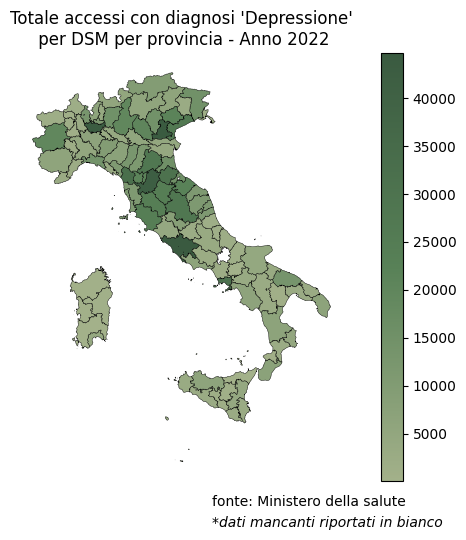

In [48]:
df_plot = df.plot(
    column="numero_accessi",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

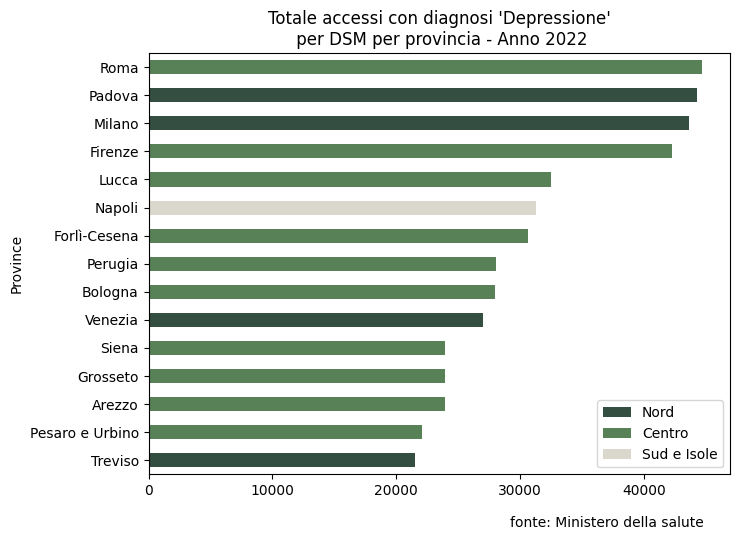

In [49]:
best_rows = df.sort_values(by=['numero_accessi'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['numero_accessi'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    y="numero_accessi",
    x="prov_name",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [50]:
best_rows

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
RM,"MULTIPOLYGON (((11.82281 42.14649, 11.82464 42...",Centro,Roma,44690.0,12.0,3724.166667
PD,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",Nord,Padova,44222.0,10.0,4422.200000
MI,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3...",Nord,Milano,43595.0,23.0,1895.434783
FI,"POLYGON ((11.20242 44.10074, 11.20259 44.10067...",Centro,Firenze,42248.0,4.0,10562.000000
LU,"POLYGON ((10.70536 43.84269, 10.70666 43.84232...",Centro,Lucca,32511.0,6.0,5418.500000
NA,"MULTIPOLYGON (((14.35567 41.00178, 14.35628 41...",Sud e Isole,Napoli,31277.0,10.0,3127.700000
FC,"POLYGON ((11.95117 43.78699, 11.95053 43.78787...",Centro,Forlì-Cesena,30630.0,12.0,2552.500000
PG,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,Perugia,28076.0,8.0,3509.500000
BO,"POLYGON ((11.13161 44.56743, 11.12953 44.56816...",Centro,Bologna,27985.0,4.0,6996.250000


In [51]:
plot_title = "Media accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

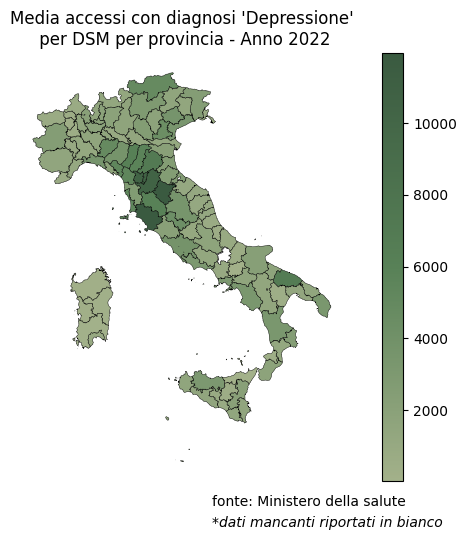

In [52]:
df_plot = df.plot(
    column="target_group_avg",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

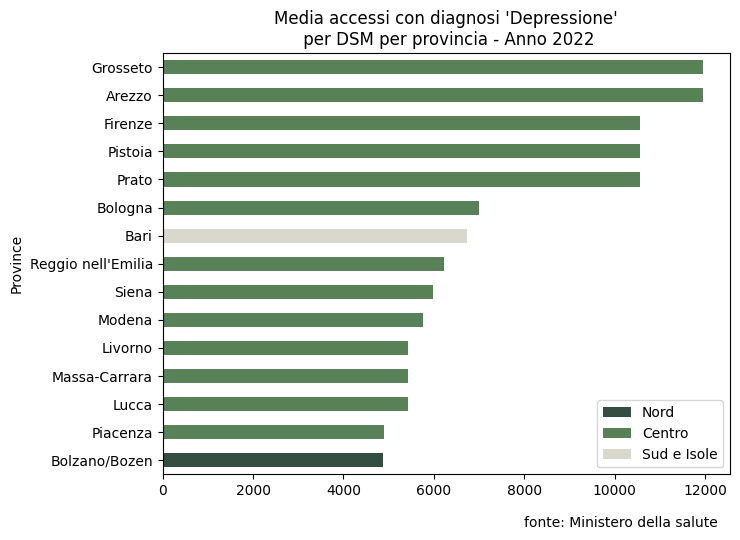

In [53]:
best_rows = df.sort_values(by=['target_group_avg'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['target_group_avg'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="target_group_avg",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [54]:
plot_title = "Numero di DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

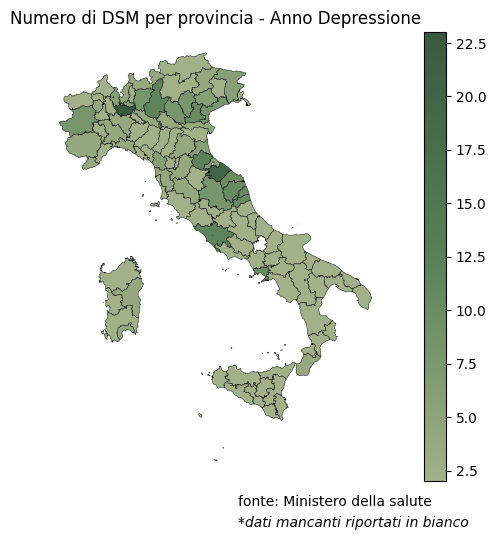

In [55]:
df_plot = df.plot(
    column="dism_count",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

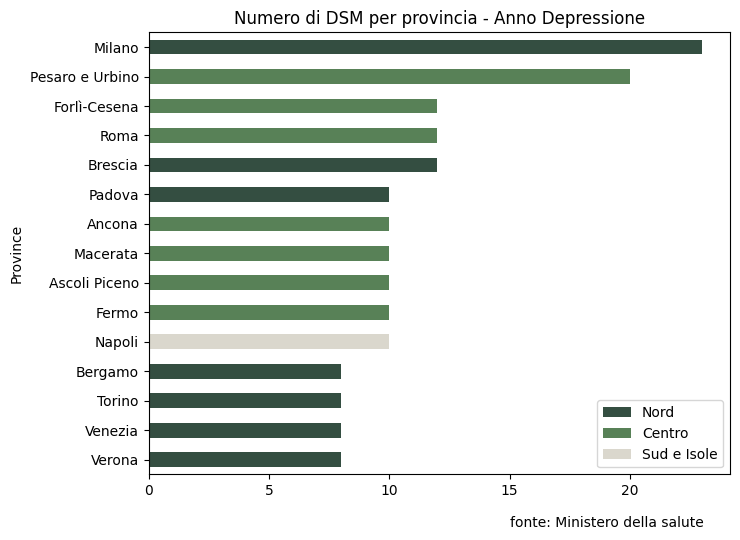

In [56]:
best_rows = df.sort_values(by=['dism_count'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['dism_count'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="dism_count",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [57]:
for i, fig_plot in enumerate(fig_plots, start=1):
    df_ = fig_plot.get("df")
    df_name = fig_plot.get("name")
    file_name = "{}/{}_{}.png".format(OUTPUT_DIR, i, df_name)
    df_.get_figure().savefig(file_name)